## **The Sparks Foundation**

## **Data Science and Business Analytics**

## **GRIP Task - 3**

## **Exploratory Data Analysis - Retail**

## **Name: Anushka Paygude**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("SampleSuperstore.csv")
df = pd.DataFrame(data)


In [4]:
print("Data has been successfully imported")

Data has been successfully imported


## **Data Cleaning**

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
df.shape

(9994, 13)

In [8]:
df.isnull().sum()    #to check for missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null entries/ missing data

In [9]:
#The country is same and postal code has nothing to work on, so we drop them
df.drop(['Country','Postal Code'], axis=1, inplace=True)

In [10]:
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


**Minimum Sales = 0.444000**	

**Maximum Sales = 22638.480000**

**Maximum Profit = 8399.976000**

In [12]:
print("Total Sales are {}".format(df['Sales'].sum()))

print("Total Profit is {}".format(df['Profit'].sum()))

Total Sales are 2297200.8603
Total Profit is 286397.0217


In [13]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
df.duplicated().sum()         #if there are duplicate rows

50

There are 50 duplicate rows

In [15]:
df.drop_duplicates(inplace=True)
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [16]:
df.duplicated().sum()

0

## **Data Visualization**

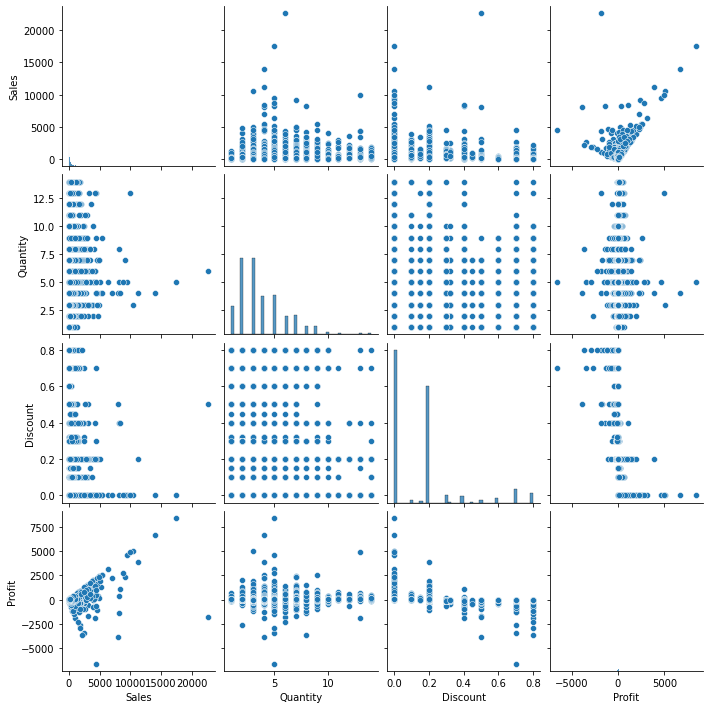

In [17]:
sns.pairplot(df)

**As the sales increase profit also increases.**

**As the discount increases profit decreases.**

**As the discount increases sales also increases.**



In [ ]:
df.corr()          #above analysis can also be done by using correlation function

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


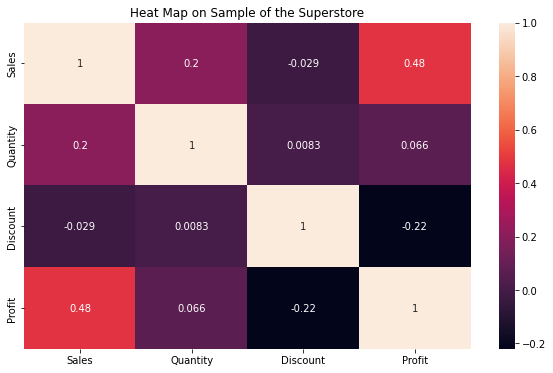

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Heat Map on Sample of the Superstore")
plt.show()

Most correlation b/w Sales and Profit (0.48)

Least correlation b/w Discount and Profit (-0.22)


### **Category**

In [18]:
ct = df["Category"].value_counts()
ct

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

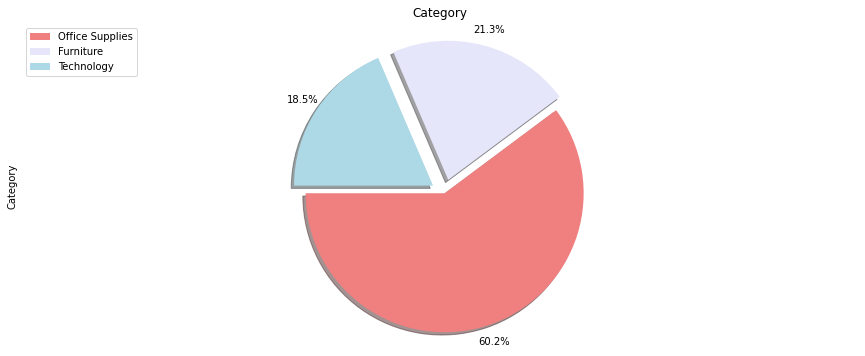

In [19]:
explode_list=[0,0.1,0.1]
colors_list=["lightcoral","lavender","lightblue"]
ct.plot(kind="pie", figsize=(15,6),autopct="%1.1f%%",shadow=True, startangle=180, 
                                   explode=explode_list, labels=None, pctdistance=1.12, colors=colors_list)
plt.title("Category")
plt.axis("equal")
plt.legend(labels=ct.index,loc="upper left")
plt.show()

**The business deals most in Office Supplies and least in technology**

In [22]:
#Category wise Sales
cs=df.groupby("Category").Sales.sum()
#Category wise Profit
cp=df.groupby("Category").Profit.sum()

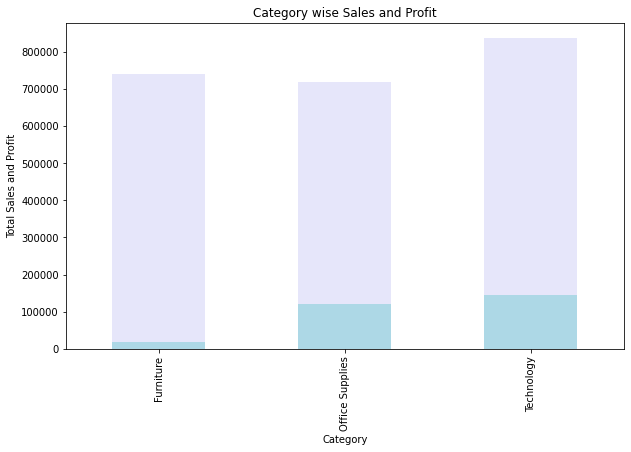

In [25]:
#Sales
ax0=cs.plot(kind="bar", figsize=(10,6), color="lavender")

#Profit
ax0=cp.plot(kind="bar", figsize=(10,6), color="lightblue")

ax0.set_title("Category wise Sales and Profit")
ax0.set_ylabel("Total Sales and Profit")

plt.show()

Maximum Profit and Sales in Category: Technology

Minimum Profit and Sales in Category: Office Supplies

### **State**

In [29]:
state=df["State"].value_counts()
state

California              1980
New York                1119
Texas                    980
Pennsylvania             581
Washington               502
Illinois                 490
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

Text(0, 0.5, 'Number of Buyers')

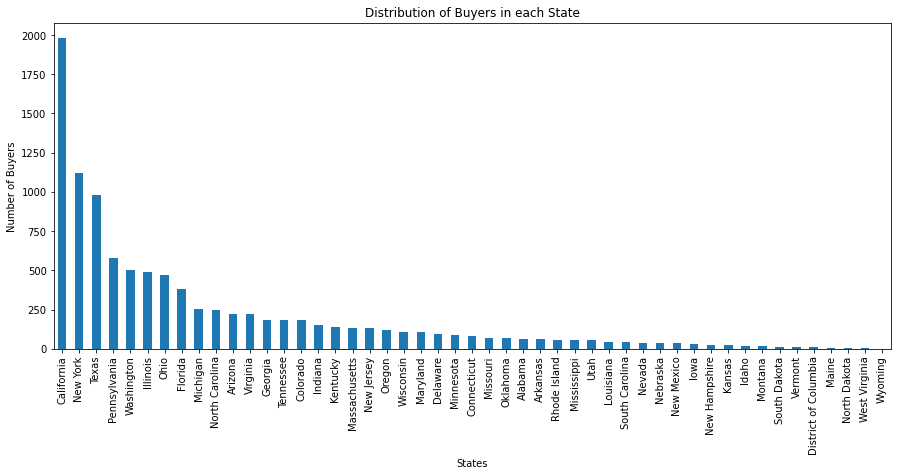

In [30]:
state.plot(kind="bar",figsize=(15,6))
plt.title("Distribution of Buyers in each State")
plt.xlabel("States")
plt.ylabel("Number of Buyers")

**Most buyers belong to "California"**

**Least buyers belong to "Wyoming"**

In [31]:
ss=df.groupby(["State"]).Sales.sum()
sp=df.groupby(["State"]).Profit.sum()

Text(0, 0.5, 'Profit')

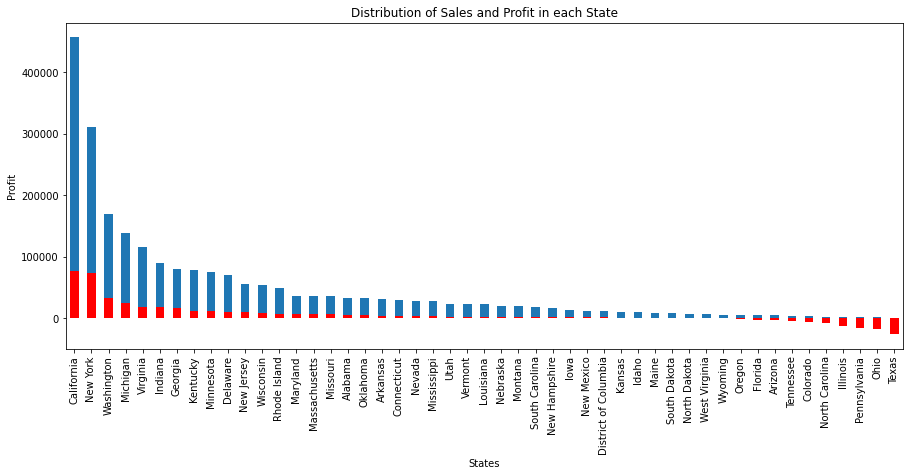

In [32]:
#State wise sales  - blue color
ss.sort_values(ascending=False).plot(kind="bar",figsize=(15,6)) 
plt.xlabel("States")
plt.ylabel("Sales")

#State wise Profit - red color
sp.sort_values(ascending=False).sort_values(ascending=False).plot(kind="bar",figsize=(15,6),color="red")
plt.title("Distribution of Sales and Profit in each State")
plt.xlabel("States")
plt.ylabel("Profit")

Most state wise sales and profit: California

Least state wise sales and profit : Texas

### **Segment**

In [33]:
seg=df["Segment"].value_counts()
seg

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

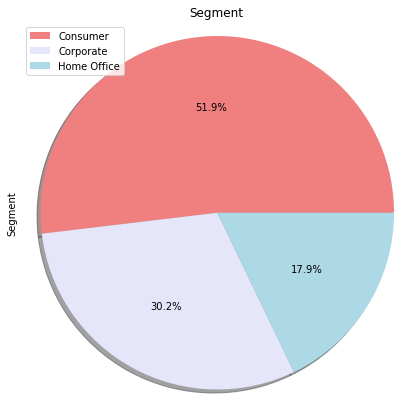

In [34]:
seg.plot(kind="pie",figsize=(7,7),autopct="%1.1f%%",
         shadow=True,labels=None,colors=["lightcoral","lavender","lightblue"])
plt.title("Segment")
plt.legend(labels=seg.index,loc="upper left")
plt.axis("equal")
plt.show()


**Major business distribution in Consumer Segment**

**Least business distribution in Home Office Segment**

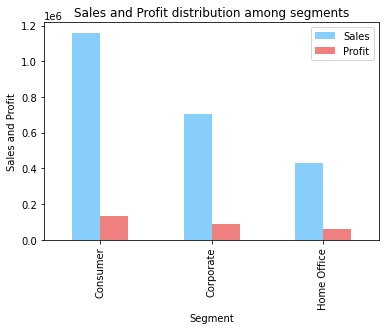

In [37]:
df.groupby("Segment")[["Sales","Profit"]].sum().plot(kind="bar",color=["lightskyblue","lightcoral"])
plt.ylabel("Sales and Profit")
plt.xlabel("Segment")
plt.title("Sales and Profit distribution among segments")
plt.show()


**Most Sales and Profit: Consumer**

**Least Sales and Profit: Home Office** 

### **Region**

In [38]:
reg=df["Region"].value_counts()
reg

West       3177
East       2832
Central    2315
South      1620
Name: Region, dtype: int64

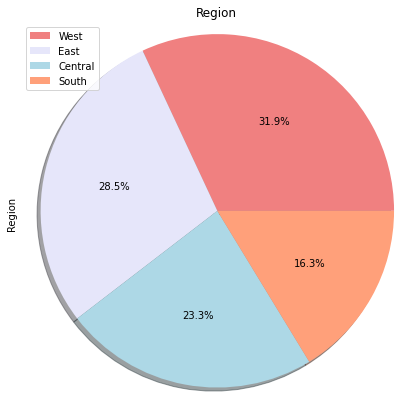

In [39]:
reg.plot(kind="pie",figsize=(7,7),autopct="%1.1f%%",
         shadow=True,labels=None, colors=["lightcoral","lavender","lightblue","lightsalmon"])
plt.title("Region")
plt.legend(labels=reg.index,loc="upper left")
plt.axis("equal")
plt.show()

**Business majorly in West Region**

**Business least in South Region** 

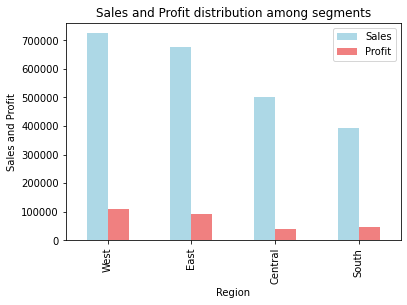

In [40]:
df.groupby("Region")[["Sales","Profit"]].sum().sort_values(by=["Sales","Profit"],ascending=False).plot(kind="bar",color=["lightblue","lightcoral"])
plt.ylabel("Sales and Profit")
plt.xlabel("Region")
plt.title("Sales and Profit distribution among segments")
plt.show()

**More profit from West and East**

**Less profit from central and southern regions.**

### **Relation among Sales, Profit and Discount**

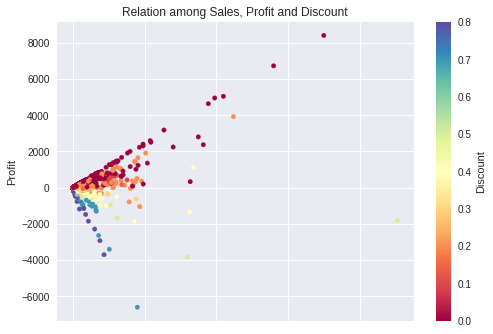

In [41]:
plt.style.use("seaborn")
df.plot(kind="scatter",x="Sales",y="Profit",c="Discount",colormap="Spectral")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Relation among Sales, Profit and Discount")
plt.show()

As Discount increases Profit decreases.

Discount and Sales have a lesser relation but Sales also decrease with increasing discount.

### **Observations**

1.As Discount increases Profit decreases

  As Discount increases Sales decrease

  As Sales increase Profit increases

2.Most correlation b/w Sales and Profit 

  Least correlation b/w Discount and Profit

3.Major distribution of business is in Office Supplies 
  and Least in Technology

5.Maximum Profit and Sales in Category: Technology

  Minimum Profit and Sales in Category: Office Supplies


6.Most buyers belong to "California", "New York" and      "Texas"

  Least buyers belong to "Wyoming", "West Virginia" and  "North Dakota"

7.Maximum Sales and Profit in cities: "California" and "New York"

 Minimum Sales and Profit in cities: "Oregon", "Florida",  "Arizona", "Tennessee", "Colorado", "North Carolina",   "Ilionis", "Pennsylvania", "Ohio" and "Texas"

8.Major business distribution in Consumer Segment and   Least in Home Office

9.Most Profit and Sales in Consumer segment and least in Home Office

10.Company deals majorly in Western Region and least in Southern Region

11.More Profit from Western and Eastern Regions whereas lesser profits from Central and Southern regions.

12.As Discount increases Profit decreases.

Discount and Sales have a lesser relation but Sales also decrease with increasing discount.

**Conclusion**

1.Lower discounts to increase Profit and Sales.

2.Move the major distribution of business towards Technology(most profitable) rather than Office Supplies(least profitable)

3.Keep focus over the cities with most buyers and most sales and profit, that are, "California" and "New york".

4.Consumer segment should be focused on as it brings most sales and profit.

5.Western and Eastern regions should be focussed upon for major chunk of sales and profit.